<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [867]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [809]:
import gdown
url = 'https://drive.google.com/uc?id=1Ht4l7GoQnBOBBNzKuOozBF7g-l9FxkqK'
output_path = 'dst-3.0_16_1_hh_database.csv'
gdown.download(url, output_path, quiet=False)
data = pd.read_csv('dst-3.0_16_1_hh_database.csv', delimiter=';')

Downloading...
From: https://drive.google.com/uc?id=1Ht4l7GoQnBOBBNzKuOozBF7g-l9FxkqK
To: /content/dst-3.0_16_1_hh_database.csv
100%|██████████| 455M/455M [00:07<00:00, 61.5MB/s]


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [810]:
data

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано
...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [811]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

Поле "Опыт работы" имеет небольшое количество пропущенных значений (всего 168 записей), есть пропуски в полях "Последнее/нынешнее место работы" (1 запись) и "Последняя/нынешняя должность" (2 записи). При общем количестве строк в датасете 44744 эти количество пропусков незначительно, все остальные поля в датасете имеют непустые значения для всех записей.

5. Выведите основную статистическую информацию о столбцах.


In [812]:
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [813]:
# Функция для извлечения уровня образования из первых двух слов
def extract_education(text):
    text = text.lower()
    words = text.split()[:2]
    if "высшее" in words and "образование" in words:
        return "высшее"
    elif "неоконченное" in words and "высшее" in words:
        return "неоконченное высшее"
    elif "среднее" in words and "специальное" in words:
        return "среднее специальное"
    elif "среднее" in words and "образование" in words:
        return "среднее"
    else:
        return "другое"

# Создание нового столбца
data['Образование'] = data['Образование и ВУЗ'].apply(extract_education)

# Количество в каждой категории
education_counts = data['Образование'].value_counts()
print(education_counts)


высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [814]:
# Функция для извлечения возраста
def extract_age(text):
    age_match = re.search(r'(\d+)\s*(?:года*|год|лет)', text)
    if age_match:
        return age_match.group(1)
    return '0'

# Создание и заполнение новых столбцов
data['Пол'] = data['Пол, возраст'].str.extract('(Мужчина|Женщина)', expand=False)
data['Возраст'] = data['Пол, возраст'].apply(extract_age)
data['Пол'] = data['Пол'].str.strip()

# Статистика по новым столбцам
print("Статистика по столбцу 'Пол':", data['Пол'].value_counts())
print("\nСтатистика по столбцу 'Возраст':", data['Возраст'].astype(float).describe())

Статистика по столбцу 'Пол': Мужчина    36211
Женщина     8533
Name: Пол, dtype: int64

Статистика по столбцу 'Возраст': count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64


In [815]:
# Процентное распределение по столбцу Пол
gender_percentage = (data['Пол'].value_counts(normalize=True) * 100).round(2)
gender_percentage

Мужчина    80.93
Женщина    19.07
Name: Пол, dtype: float64

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [816]:
# Извлечение опыта работы
def convert_experience(str_in: str) -> str:
    try:
        exp = str_in.split()[2:6]
        if len(exp) != 4:
            return np.NaN

        year = int(exp[0]) if exp[1].startswith('год') or exp[1].startswith('лет') else 0
        month = 0
        if exp[1].startswith('мес'):
            month = int(exp[0])
        elif exp[3].startswith('мес'):
            month = int(exp[2])
    except:
        return np.NaN
    return int(year * 12 + month)

data['Опыт работы (месяц)'] = data['Опыт работы'].apply(convert_experience)
data = data.drop('Опыт работы', axis=1)

In [817]:
# Медиана опыта работы (в месяцах)
data["Опыт работы (месяц)"].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , …
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [818]:
# Функция для извлечения признаков города, готовности к переезду и командировкам
def extract_city(text):
    cities = ['Москва', 'Санкт-Петербург']
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    parts = [part.strip() for part in text.split(',')]

    city = parts[0]
    if city in cities:
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

data['Город'] = data['Город, переезд, командировки'].apply(extract_city)

# Статистика по категориям городов
city_stats = data['Город'].value_counts()
city_stats

Москва              16621
другие              15854
город-миллионник     7332
Санкт-Петербург      4937
Name: Город, dtype: int64

In [819]:
# Функция для создания категорий по готовности к переезду
def extract_relocation(text):
    text_lower = text.lower()
    if ('готов к переезду' in text_lower or
        'готова к переезду' in text_lower or
        'хочу переехать' in text_lower) and 'не готов' not in text_lower:
        return True
    else:
        return False
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(extract_relocation)

# Cтатистика по категориям
relocation_stats = data['Готовность к переезду'].value_counts()
print(relocation_stats)

False    30410
True     14334
Name: Готовность к переезду, dtype: int64


In [820]:
# Функция для создания категорий готовности к командировкам
def extract_business_trips(text):
    if 'не готов' in text:
        return False
    else:
        return True
        print("\nСтатистика по готовности к командировкам:")

data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(extract_business_trips)

# Cтатистика по категориям
business_trips_stats = data['Готовность к командировкам'].value_counts()
business_trips_stats

False    30410
True     14334
Name: Готовность к командировкам, dtype: int64

In [821]:
# Процент соискателей, готовых и к переездам, и к командировкам
both_ready_percentage = (data['Готовность к переезду'] & data['Готовность к командировкам']).mean() * 100
both_ready_percentage

32.03558018952262

In [822]:
# Удаление столбца "Город, переезд, командировки"
data.drop('Город, переезд, командировки', axis=1, inplace=True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [823]:
unique_employment = data['Занятость'].unique()[:10]
unique_employment

array(['частичная занятость, проектная работа, полная занятость',
       'полная занятость', 'частичная занятость, полная занятость',
       'частичная занятость',
       'стажировка, частичная занятость, проектная работа, полная занятость',
       'проектная работа, частичная занятость, полная занятость',
       'частичная занятость, проектная работа',
       'проектная работа, полная занятость',
       'стажировка, полная занятость',
       'стажировка, частичная занятость, проектная работа'], dtype=object)

In [824]:
unique_employment = data['График'].unique()[:10]
print(unique_employment)

['гибкий график, полный день, сменный график, вахтовый метод, удаленная работа'
 'гибкий график, полный день, сменный график, удаленная работа'
 'полный день' 'гибкий график, удаленная работа'
 'полный день, сменный график' 'удаленная работа'
 'полный день, удаленная работа' 'гибкий график, полный день'
 'гибкий график, полный день, удаленная работа'
 'гибкий график, полный день, сменный график']


In [825]:
# Создание категорий и заполнение их бинарными значениями
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
for category in employment_categories:
    data[f'Занятость_{category}'] = data['Занятость'].str.contains(category)

data['Занятость'] = data.apply(lambda row: next((category for category in employment_categories if row[f'Занятость_{category}']), None), axis=1)

# Статистика по категориям
for category in employment_categories:
    print(data[f'Занятость_{category}'].value_counts())

True     43284
False     1460
Name: Занятость_полная занятость, dtype: int64
False    31608
True     13136
Name: Занятость_частичная занятость, dtype: int64
False    36676
True      8068
Name: Занятость_проектная работа, dtype: int64
False    44258
True       486
Name: Занятость_волонтерство, dtype: int64
False    41940
True      2804
Name: Занятость_стажировка, dtype: int64


In [826]:
# Создание категорий по графику и заполнение их бинарными значениями
schedule_categories = ['гибкий график', 'полный день', 'сменный график', 'удаленная работа', 'вахтовый метод']

for category in schedule_categories:
    data[f'График_{category}'] = data['График'].str.contains(category)

data['График'] = data['График'].str.contains('гибкий график')

# Статистика по категориям
for category in schedule_categories:
    print(data[f'График_{category}'].value_counts())

False    29160
True     15584
Name: График_гибкий график, dtype: int64
True     41716
False     3028
Name: График_полный день, dtype: int64
False    32019
True     12725
Name: График_сменный график, dtype: int64
False    29722
True     15022
Name: График_удаленная работа, dtype: int64
False    41660
True      3084
Name: График_вахтовый метод, dtype: int64


In [827]:
# Подсчет количества строк, где и 'График_вахтовый метод' и 'График_гибкий график' равны True
count_both_true = data[(data['График_вахтовый метод'] == True) & (data['График_гибкий график'] == True)].shape[0]

print(f"Количество людей, где 'График_вахтовый метод' и 'График_гибкий график' равны True: {count_both_true}")


Количество людей, где 'График_вахтовый метод' и 'График_гибкий график' равны True: 2311


In [828]:
# Удаление столбцов "Занятость" и "График"
data.drop(columns=['Занятость', 'График'], inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [829]:
import gdown
url = 'https://drive.google.com/uc?id=1CyLBEiGZ76pz_9UTfkHjaWW899re9SWF'
output_path = 'ExchangeRates.csv'
gdown.download(url, output_path, quiet=False)
exchange_rates_df = pd.read_csv('ExchangeRates.csv', delimiter=',')

Downloading...
From: https://drive.google.com/uc?id=1CyLBEiGZ76pz_9UTfkHjaWW899re9SWF
To: /content/ExchangeRates.csv
100%|██████████| 198k/198k [00:00<00:00, 45.3MB/s]


In [830]:
exchange_rates_df

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1
...,...,...,...,...,...,...,...
5659,AZN,D,02/12/19,00:00,37.7729,0,1
5660,AZN,D,03/12/19,00:00,37.9662,0,1
5661,AZN,D,04/12/19,00:00,37.8073,0,1
5662,AZN,D,05/12/19,00:00,37.8396,0,1


In [831]:
# Приведение дат к единому формату
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date
exchange_rates_df['date']= pd.to_datetime(exchange_rates_df['date'],format='%d/%m/%y').dt.date

# Извлечение зарплаты и валюты
data[["ЗП", "Валюта"]] = list(data["ЗП"].apply(lambda x : x.split() ))
data['ЗП'] = data['ЗП'].apply(lambda x : float(x))

# Создание словаря соответствия обозначения валют и приведение данных к общепринятому виду
curreny_mapping = pd.Series({ 'грн.': 'UAH','USD': 'USD', 'EUR': 'EUR', 'бел.руб.': 'BYN', 'KGS': 'KGS', 'сум': 'UZS', 'AZN': 'AZN', 'KZT': 'KZT', 'руб.': 'руб.'})
data['Валюта'] = data['Валюта'].map(curreny_mapping)

# Присоединение датафрейма с курсами валют
data = pd.merge(data, exchange_rates_df, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how= 'left' )

# Заполнение данных для зарплат в рублях
data['close'] = data['close'].fillna(1.0)
data['proportion'] = data['proportion'].fillna(1.0)

# Заполнение данные для зарплат в валюте
data['ЗП (руб.)'] = data['ЗП'] * data['close'] / data['proportion']

# Удаление ненужных столбцов
data.drop(['ЗП', 'Валюта', 'currency', 'per', 'date',  'time',  'close', 'vol',  'proportion'], axis= 1, inplace= True )

In [832]:
# Медиана ЗП (руб.)
median_salary = data['ЗП (руб.)'].median()
median_salary

59019.0

Ответы на контрольные вопросы

In [833]:
# Модальное значение в столбце "Возраст"
age_mode = data['Возраст'].mode()
age_mode[0]

'30'

In [834]:
# Максимальный значения в столбце "Опыт работы (месяц)"
max_experience_months = data["Опыт работы (месяц)"].max()
max_experience_months

1188.0

In [835]:
extreme_salaries = data[(data['ЗП (руб.)'] > 1000000) | (data['ЗП (руб.)'] < 1000)]
extreme_salaries.shape[0]

89

In [836]:
# Категория образования с максимальной медианной заработной платой
median_salaries_by_education = data.groupby('Образование')['ЗП (руб.)'].median()
median_salaries_by_education.idxmax()

'высшее'

In [837]:
# Город с наибольшим показателем желаемой заработной платы
max_desired_salary_index = data['ЗП (руб.)'].idxmax()
data.loc[max_desired_salary_index, 'Город']

'другие'

In [838]:
# Самая быстрая интенсивность карьерного роста наблюдается для категории образования
initial_median_salaries = data[data['Опыт работы (месяц)'] <= 24].groupby('Образование')['ЗП (руб.)'].transform('median')
current_median_salaries = data.groupby('Образование')['ЗП (руб.)'].transform('median')
career_growth_intensity = current_median_salaries - initial_median_salaries
data['Образование'][career_growth_intensity.idxmax()]

'высшее'

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

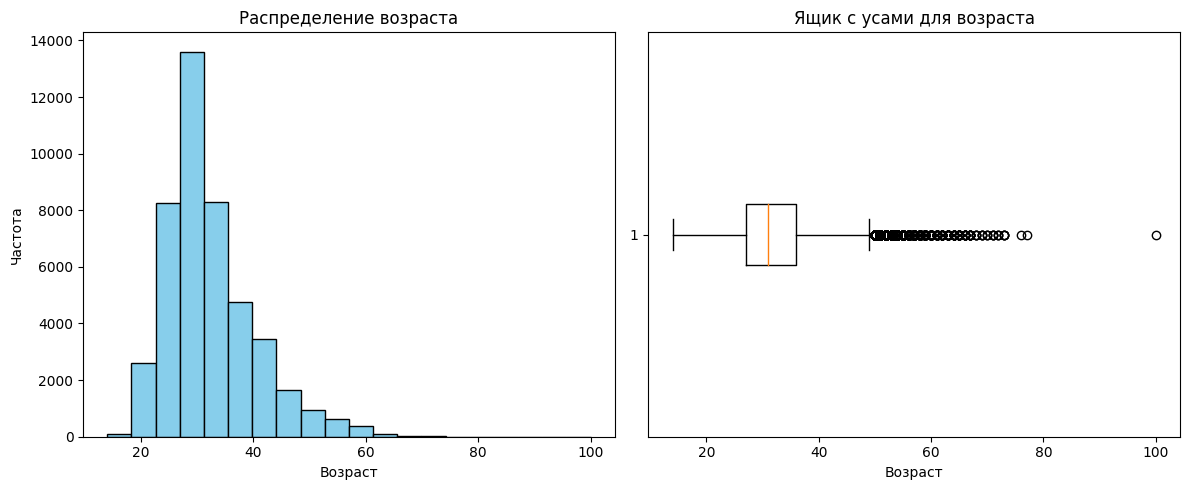

In [839]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
data['Возраст'] = data['Возраст'].astype(int)

# Гистограмма распределения возраста
ax1.hist(data['Возраст'], bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Распределение возраста')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Частота')

# Коробчатая диаграмма распределения возраста
ax2.boxplot(data['Возраст'], vert=False)
ax2.set_title('Ящик с усами для возраста')
ax2.set_xlabel('Возраст')

plt.tight_layout()
plt.show()

**Выводы:**<br>
Распределение возраста похоже на нормальное, но смещено влево (больше молодых людей). Большинство людей - между 25 и 45.<br>
После 50 лет количество людей стабильно уменьшается с возрастом.<br>
Медианный возраст находится в районе 35 лет, мода - 30 лет.<br>
Есть выбросы (люди старше примерно 55 лет), но в целом типичное распредение.<br>Аномалия - 100 лет

**Предположения:**<br>
Для hh.ru я бы сделала предположение, что сервис мало популярен среди молодежи в возрасте до 20 лет, поскольку на сайте представлено недостаточно вакансий стажировок (так как нет длинного хвоста, группа однородна, но малочисленна) - это может быть полезным выводом, если у hh.ru есть планы по расширению ЦА за счет молодежи. С точки зрения hh.ru возрастную категории старше 55 скорее нужно считать не выбросами, а выборкой, которую нужно анализировать отдельно. Возможно, это люди на пенсии, которым интересны гибкие формы занятости, такие как частичная занятость, проектная работа или консультации, что может не полностью отражаться в стандартных вакансиях, либо таких вакансий недостаточное количество, что также может быть использовано в маркетинге для расширения числа пользователей за счет этой возрастной группы. Если 100 лет - это аномалия, то возможно стоило бы ограничить возможнось ввода возраста (или даты рождения) при заполнения профиля соискателя. <br>
Знание этого распределения помоголо бы и работодателям планировании программ обучения и развития, а также при создании планов карьерного роста, и соискателям для понимания конкурентной среды. Например, соискателям старше 40 лет нужно искать способы, чтобы выделиться среди более молодых конкурентов.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

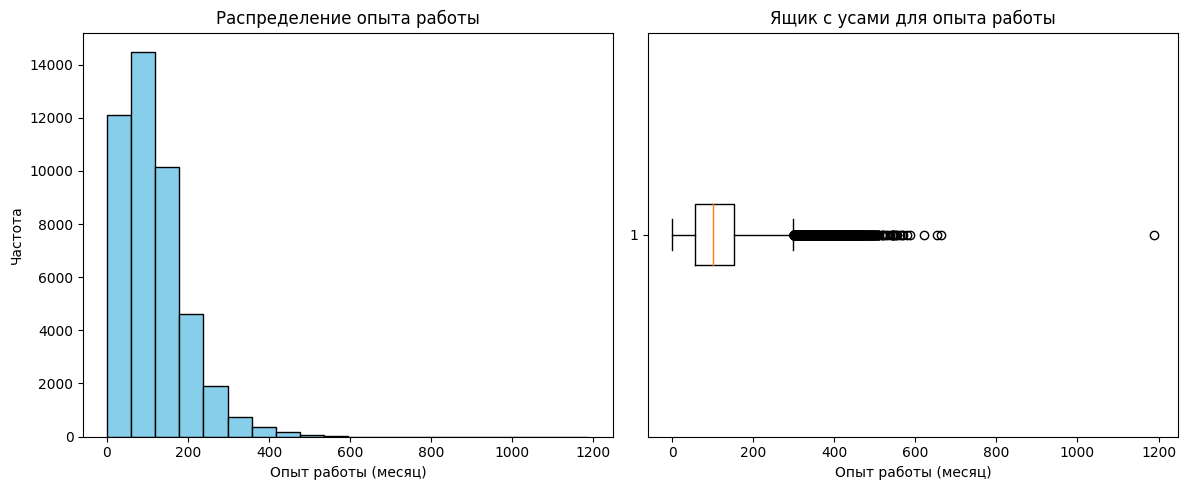

In [840]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма распределения опыта работы (месяц).
# Значение Nan исключены, поскольку их количество (168) не существенно по сравнению с общим размером (более 44 тыс. строк)
ax1.hist(data['Опыт работы (месяц)'].dropna(), bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Распределение опыта работы')
ax1.set_xlabel('Опыт работы (месяц)')
ax1.set_ylabel('Частота')

# Коробчатая диаграмма распределения опыта работы
ax2.boxplot(data['Опыт работы (месяц)'].dropna(), vert=False)
ax2.set_title('Ящик с усами для опыта работы')
ax2.set_xlabel('Опыт работы (месяц)')

plt.tight_layout()
plt.show()

**Выводы:**<br>
Большинство соискателей имеют опыт работы от 0 до примерно 16,5 лет.<br>
Распределение опыта работы имеет смещение с большинством значений в левой части графика, что указывает на большее количество соискателей с меньшим опытом работы.<br>
на графике видны выбросы для кандидатов с очень большим опытом работы.<br>

**Выводы:**<br>
Наличие выбросов с большим опытом работы может указывать на ошибки в данных (надо посчитать отдельно) или на то, что платформа также привлекает ветеранов индустрии, и это может быть ценной информацией для hh.ru при анализе ЦА и позиционироваться для компаний-работодателей как ценный источник для найма опытных специалистов.<br>
Знание медианы (типичного опыта работы) может быть полезно hh.ru при оценке стандартных требований к опыту при размещении вакансий или анализа ЦА, особенно с учетом того, что большинство пользователей hh.ru имеют относительно невысокий уровень опыта работы. К примеру, вакансии можно адаптировать так, чтобы они соответствовали наиболее распространенным уровням опыта среди соискателей, что увеличивает шансы на успешное привлечение кандидатов.<br>
Для Skillfactory: Соискатели с меньшим опытом могут быть основной целевой аудиторией для программ профессионального обучения и переподготовки.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


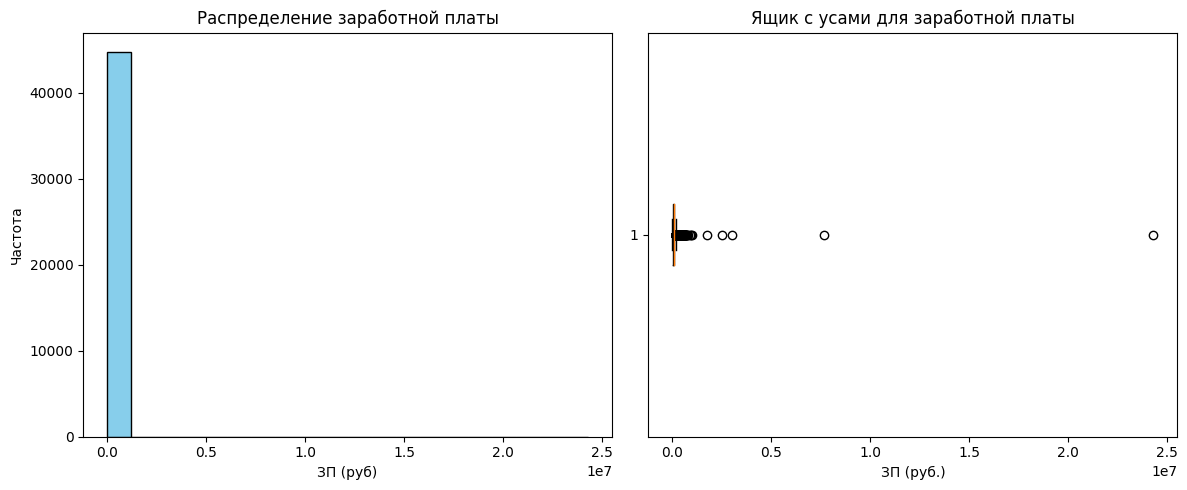

In [841]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма распределения заработной платы (руб).
ax1.hist(data['ЗП (руб.)'], bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Распределение заработной платы')
ax1.set_xlabel('ЗП (руб)')
ax1.set_ylabel('Частота')

# Коробчатая диаграмма распределения заработной платы
ax2.boxplot(data['ЗП (руб.)'], vert=False)
ax2.set_title('Ящик с усами для заработной платы')
ax2.set_xlabel('ЗП (руб.)')

plt.tight_layout()
plt.show()


**Выводы:** <br>Большинство соискателей указывают заработную плату в более низком диапазоне (приблизительно до 100 тыс. руб.), это что видно по высокому столбцу слева от графика.<br>
На графике видны выбросы для кандидатов с очень высокими зарплатными ожиданиями. <br>
**Предположения:** <br>
Возможно, если выбросы с очень высокими зарплатами не являются ошибками в данных, таких кандидатов можно продавать работадателям в индивидуальном порядке, потому что требования не типичные, и они могут совпадать с нетипичными требованиями некоторых (таких же нетипичных) работодателей.<br><br>

В целом такой график не является достаточно информативным, поэтому построю такой же график с логарифмированной зарплатой.

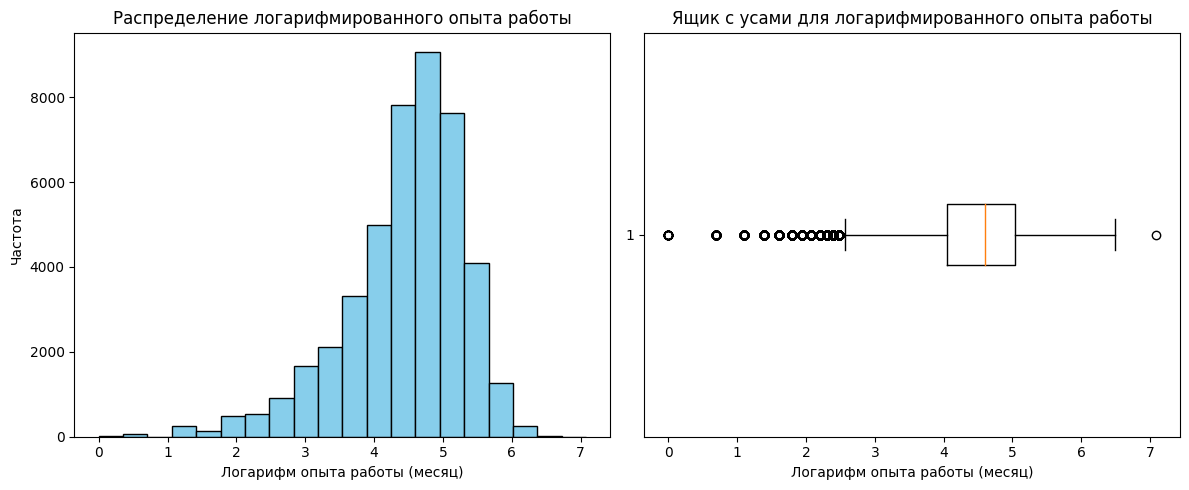

In [842]:
data['Логарифм опыта'] = np.log(data['Опыт работы (месяц)'].dropna())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма распределения логарифмированного опыта работы
ax1.hist(data['Логарифм опыта'].dropna(), bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Распределение логарифмированного опыта работы')
ax1.set_xlabel('Логарифм опыта работы (месяц)')
ax1.set_ylabel('Частота')

# Коробчатая диаграмма распределения логарифмированного опыта работы
ax2.boxplot(data['Логарифм опыта'].dropna(), vert=False)
ax2.set_title('Ящик с усами для логарифмированного опыта работы')
ax2.set_xlabel('Логарифм опыта работы (месяц)')

plt.tight_layout()
plt.show()

In [843]:
data.drop('Логарифм опыта', axis=1, inplace=True)

**Выводы:** <br>Теперь распределение опыта работы соискателей представляет собой нормальное распределение, симметричным и менее скошенным, что облегчает визуальное восприятие и анализ. Выбросы также отражены.<br>
Распределение имеет пик в районе значений 3-4 на логарифмической шкале, что соответствует приблизительно от 20 до 55 месяцев опыта работы, то есть что большинство соискателей имеют от 1.5 до 4.5 лет опыта.
Медиана находится в районе значения 3.5, что соответствует примерно 33 месяцам или около 2.75 лет опыта.
Интерквартильный размах (ширина ящика) показывает, что большая часть соискателей имеет опыт работы в пределах от 1 до 6 лет.

**Предположения:** <br>Наличие значительного числа соискателей с низким уровнем опыта может указывать на большое количество начинающих специалистов или выпускников. Нужно посмотреть корреляцию с возрастом.<br>
Имеет смысл сегментировать пользователей по опыту работы и по другим показателям, это поможет в разработке стратегии для привлечения и удержания соискателей с разным уровнем опыта.<br>
Имеет смысл предоставить работодателям информацию о сегментах соискателей, что может помочь в формулировании требований к вакансиям и в определении уровня зарплат.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

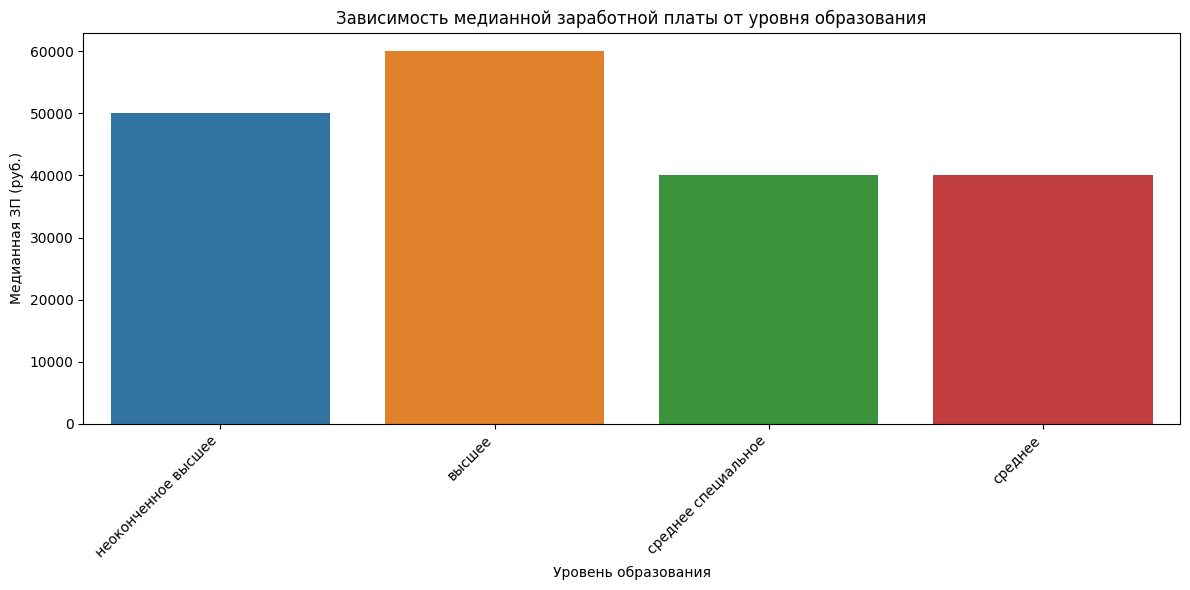

In [844]:
filtered_data = data[data['ЗП (руб.)'] < 1000000]

# Диаграмма зависимости медианной заработной платы от уровня образования
plt.figure(figsize=(12, 6))
sns.barplot(x='Образование', y='ЗП (руб.)', data=filtered_data, estimator=np.median, errorbar=None)
plt.title('Зависимость медианной заработной платы от уровня образования')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб.)')
plt.tight_layout()
plt.show()

**Выводы (вместе с предположениями):**<br>
Соискатели с неоконченным высшим образованием имеют самую низкую медианную заработную плату. Это может быть связано с тем, что работодатели имеют предубеждение против неоконченного образования (и это известный тренд), или с комплексами пользователей, которые так считают и оценивают себя ниже, ил у них недостаточный опыт для желаемых позиций, или несоответствие направления образования. Возможно, это отдельный сегмент, который нужно изучить внимательнее.<br>
Кандидаты с высшим образованием ожидают самую высокую медианную заработную плату. Это отражает общую рыночную тенденцию и вопросов не вызывает.
Соискатели с средним специальным образованием имеют медианную заработную плату меньше, чем у кандидатов с высшим образованием, но больше, чем у тех, кто указал "Неоконченное высшее". Возможно, это указывает на спрос на определенные скиллы, которыми обладают соискатели среднего специального образования. <br>
Соискатели с средним образованием имеют примерно такую же медианную заработную плату, как и соискатели с средним специальным образованием. Это довольно неожиданно. Можно предположить, что они обладают определенными навыками и опытом в определенной сфере деятельности, но это также требует дополнительного анализа.<br><br>

В целом, это интересные данные, которые hh.ru (особенно при более детальном изучении) может использовать для PR и маркетинга, а также Skillfactory стоит (если уже не сделано) продвигать свои образовательные программы для категории людей с неоконченным высшим образованием, позиционируя их как возможность повышения их ценности на рынке труда. Работодателям тоже могут быть полезны эти данные для политики формирования заработной платы и кадровой стратегии.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

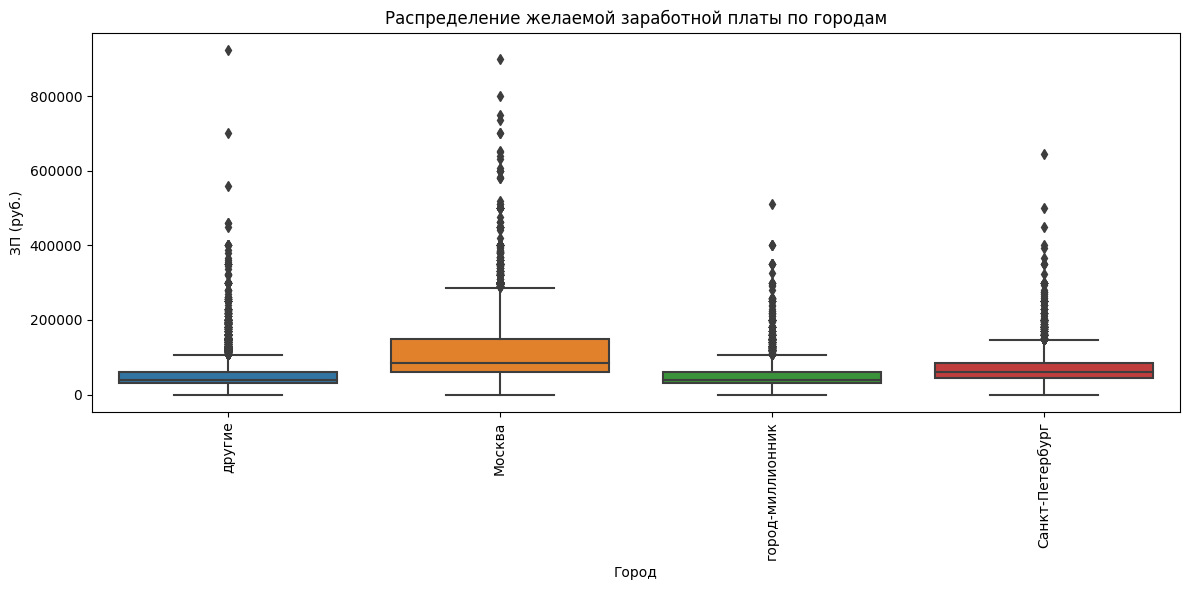

In [845]:
# Диаграмма распределения желаемой заработной платы по городам
plt.figure(figsize=(12, 6))
sns.boxplot(x='Город', y='ЗП (руб.)', data=filtered_data)
plt.title('Распределение желаемой заработной платы по городам')
plt.xticks(rotation=90)
plt.xlabel('Город')
plt.ylabel('ЗП (руб.)')
plt.tight_layout()
plt.show()

**Выводы**:<br>
Москва имеет самый высокий медианный уровень заработной платы среди представленных городов, это вполне понятно, отражает высокий уровень жизни и концентрацию высокооплачиваемых специалистов. Усы длинные и есть достаточное количество выбросов, это может указывать на широкое разнообразие возможных ролей и позиций.<br>
В Санкт-Петербурге также высокая медианная з/п, но ниже Москвы. Размах и количество выбросов также меньше, уровень зарплатных ожиданий ниже.<br>
Медианная заработная плата и размах зарплатных ожиданий в категории "города-миллионники" лежат между Санкт-Петербургом и другими городами. Выбросы могут свидетельствовать об ошибках в данных (например, неверный ввод пользователем) или о наличии специализированных вакансий с высокими зарплатными ожиданиями.<br>
По категории "другие города" медиана зарплаты самая низкая, что отражает известную всем разницу по зарплатам в крупных городах и регионах.
Распределение зарплатных ожиданий довольно узкое, с меньшим количеством выбросов, что может указывать на более однородный рынок труда. <br><br>

В целом график отражает известные особенности кадрового рынка РФ.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

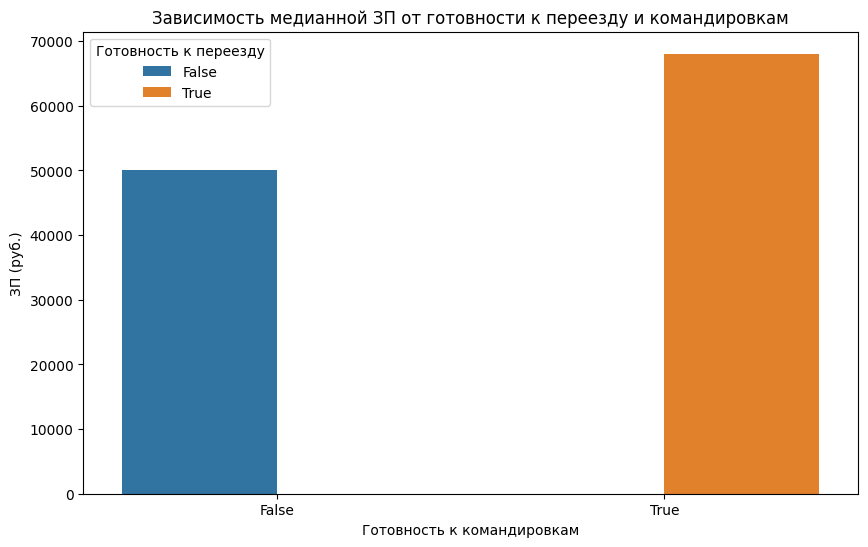

In [869]:
grouped_df = data.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб.)'].median().reset_index()

# Многоуровневая столбчатая диаграмма
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Готовность к командировкам', y='ЗП (руб.)', hue='Готовность к переезду')
plt.title('Зависимость медианной ЗП от готовности к переезду и командировкам')
plt.show()

**Выводы:** <br>Соискатели, не готовые к переезду (False), имеют медианную заработную плату около 40,000 рублей.
Соискатели, готовые к переезду (True), имеют значительно более высокую медианную заработную плату, которая превышает 60,000 рублей. Эти цифры показывают, что готовность к географической мобильности связана с более высокими ожиданиями соискателей относительно заработной платы.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

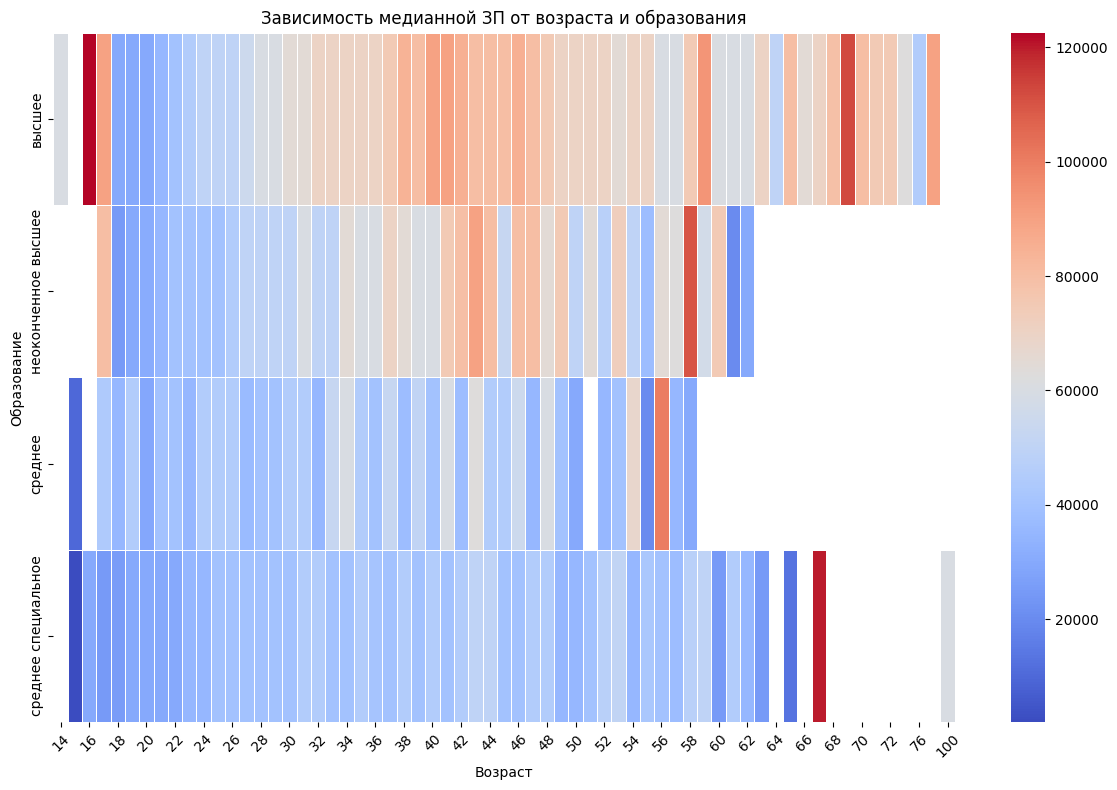

In [849]:
pivot_table = pd.pivot_table(data, values='ЗП (руб.)', index='Образование', columns='Возраст', aggfunc='median')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, fmt='.0f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Зависимость медианной ЗП от возраста и образования')
plt.xlabel('Возраст')
plt.ylabel('Образование')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Выводы:** <br>

В категории "Высшее образование" медианные зарплатные ожидания начинаются с 60,000 рублей для 14-летних и имеют тенденцию к увеличению с возрастом.
В возрасте 16 лет виден резкий всплеск до более 122,000 рублей, что может быть связано с единичными случаями или ошибками в данных.
Затем следует постепенное увеличение до возрастной группы 30-40 лет, после чего наблюдается стабилизация и в некоторых точках снижение.<br>

В категории "Неоконченное высшее образование" данные начинаются с возраста 17 лет и показывают увеличение медианных ожиданий с 25,000 до 65,000 рублей к 34 годам.<br>

Зарплатные ожидания в категории "Среднее образование" начинаются с 10,000 рублей в возрасте 15 лет и показывают постепенное увеличение до возрастной группы 30-34 лет.<br>

В категории "Среднее специальное образование" медианные ожидания начинаются с 2 000 рублей в возрасте 15 лет и постепенно увеличиваются до 40,000 рублей к 34 годам.<br><br>

Возрастные группы после 40 лет имеют меньше данных, что может влиять на надежность медианных показателей.
В возрастных группах за пределами стандартного трудоспособного возраста (более 65 лет) данные встречаются реже и могут представлять особые случаи или ошибки ввода.<br>
Скорее всего высокие значения ожидаемой заработной платы в младших возрастных группах (например, 122582 рубля для 16-летних с высшим образованием!) связаны с аномалиями в данных или ошибками ввода.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

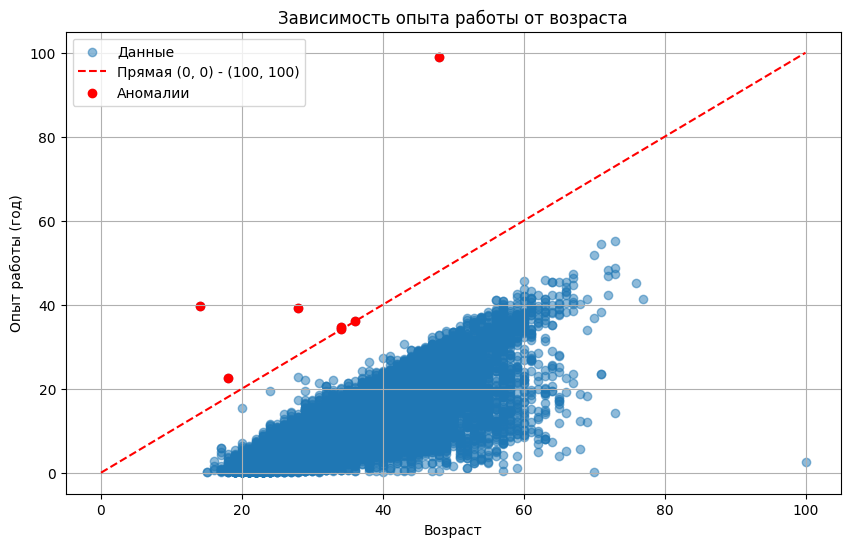

In [850]:
data['Опыт работы (год)'] = data['Опыт работы (месяц)'] / 12

# Диаграмма рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(data['Возраст'], data['Опыт работы (год)'], alpha=0.5, label='Данные')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Прямая (0, 0) - (100, 100)')
anomalies = data[data['Опыт работы (год)'] >= data['Возраст']]
plt.scatter(anomalies['Возраст'], anomalies['Опыт работы (год)'], color='red', label='Аномалии')

plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (год)')
plt.legend()
plt.grid(True)
plt.show()


In [851]:
number_of_points_above = (data['Опыт работы (год)'] > data['Возраст']).sum()
print("Количество точек выше прямой:", number_of_points_above)


Количество точек выше прямой: 7


In [852]:
data[data['Опыт работы (год)'] > data['Возраст']]

,"Пол, возраст",Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование,Пол,Возраст,...,Занятость_проектная работа,Занятость_волонтерство,Занятость_стажировка,График_гибкий график,График_полный день,График_сменный график,График_удаленная работа,График_вахтовый метод,ЗП (руб.),Опыт работы (год)
4535,"Женщина , 18 лет , родилась 5 июля 2000",Технический специалист,а,а,Среднее специальное образование 2020 Чебоксарс...,2019-04-11,Не указано,среднее специальное,Женщина,18,...,True,False,False,False,False,True,True,False,15000.0,22.583333
19351,"Мужчина , 28 лет , родился 4 сентября 1990",Специалист (Junior-программист),"Русский свет, ООО",Электрик,"Высшее образование 2012 АГУ Экономический, Упр...",2019-04-26,Не указано,высшее,Мужчина,28,...,False,False,False,False,True,False,False,False,20000.0,39.166667
19872,"Мужчина , 34 года , родился 12 ноября 1984",Аналитик,Kyivstar,Фахівець з опису бізнес процесів,Высшее образование 2007 Черкаський національни...,2019-04-26,Не указано,высшее,Мужчина,34,...,False,False,False,False,True,False,False,False,60740.5,34.666667
26477,"Мужчина , 34 года , родился 24 марта 1985",Менеджер IT-проектов,"М©й IT'M (""Информационные Технологии' Менеджм...",Основатель,"Высшее образование 2013 СГАУ имени ак, С.П. Ко...",2019-04-08,Не указано,высшее,Мужчина,34,...,True,True,True,True,True,True,True,True,80000.0,34.250000
29098,"Мужчина , 14 лет , родился 1 января 2005",Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,Высшее образование 1979 Московское высшее тех...,2019-04-26,Не указано,высшее,Мужчина,14,...,False,False,False,False,True,False,False,False,60000.0,39.750000
40015,"Мужчина , 48 лет , родился 27 января 1971",Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,Высшее образование 2014 Московский технологич...,2019-04-16,Не указано,высшее,Мужчина,48,...,False,False,False,True,True,False,True,True,60000.0,99.000000
43451,"Мужчина , 36 лет , родился 31 марта 1983",Руководитель отдела разработки,ЛАНИТ,Руководитель проекта,Высшее образование 2005 Московский Институт Эл...,2018-08-17,Не указано,высшее,Мужчина,36,...,False,False,False,False,True,False,False,False,200000.0,36.166667


**Выводы:**<br>
Есть чёткая положительная корреляция между возрастом и опытом работы. Это логично, так как с возрастом опыт работы обычно увеличивается.<br>

Несколько точек (по графику непонятно, но по выборке - 7) значительно отклоняются от основной тенденции, указывая на необычно высокий опыт работы у кандидатов относительно их возраста. Скорее всего это ошибки в данных (например, ошибка ошибкой ввода).<br>

 Большинство точек сосредоточены в нижнем левом углу графика, что указывает на то, что большинство соискателей на hh.ru имеют существенно меньший опыт работы по сравнению с возрастом.


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


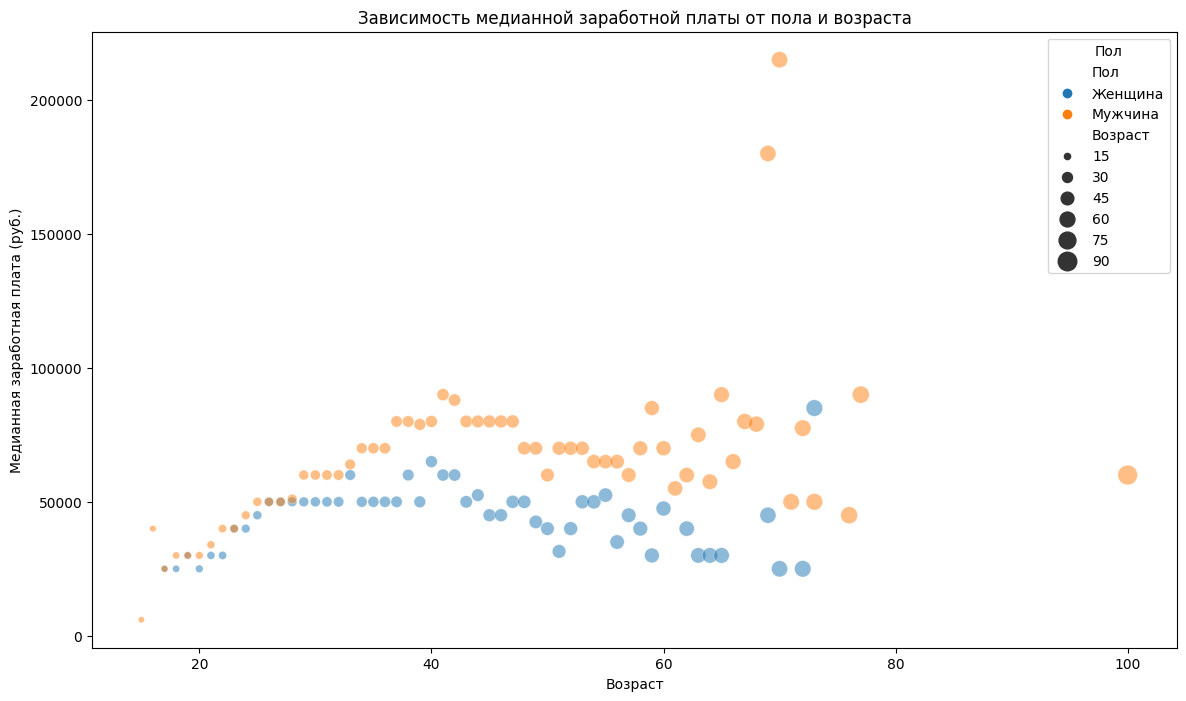

In [871]:
# Зависимость медианной заработной платы от пола и возраста
grouped_data = data.groupby(['Пол', 'Возраст'])['ЗП (руб.)'].median().reset_index()

# График рассеяния
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(data=grouped_data, x="Возраст", y="ЗП (руб.)", hue="Пол", size="Возраст", sizes=(20, 200), alpha=0.5)
plt.title('Зависимость медианной заработной платы от пола и возраста')
plt.xlabel('Возраст')
plt.ylabel('Медианная заработная плата (руб.)')
plt.legend(title='Пол')
plt.show()


**Выводы:**<br>Заработная плата кажется выше у более молодых соискателей, что может указывать на тенденцию в определённых отраслях или специальностях, где молодость является преимуществом, либо на наличие высокооплачиваемых вакансий, доступных для молодёжи. С увеличением возраста наблюдается некоторое снижение заработной платы, что может быть связано с переходом в более стабильные, но менее оплачиваемые позиции или с изменениями в карьерных предпочтениях.<br>

Видны различия в заработных платах между мужчинами и женщинами; в частности, мужчины в некоторых возрастных группах имеют более высокую заработную плату по сравнению с женщинами. В то же время в других возрастных группах медианная заработная плата кажется более равномерной между полами, возможно в определённых профессиях.<br>

На графике присутствуют точки, которые значительно отличаются по уровню заработной платы от основной массы данных. Это может быть связано с особенностями определённых должностей, специальностей или уникальными квалификациями отдельных кандидатов, а могут быть выбросами.<br>

Общая тенденция показывает, что медианная заработная плата уменьшается с возрастом после определённого пика. Это может быть связано с переходом на пенсию или снижением активности на рынке труда.

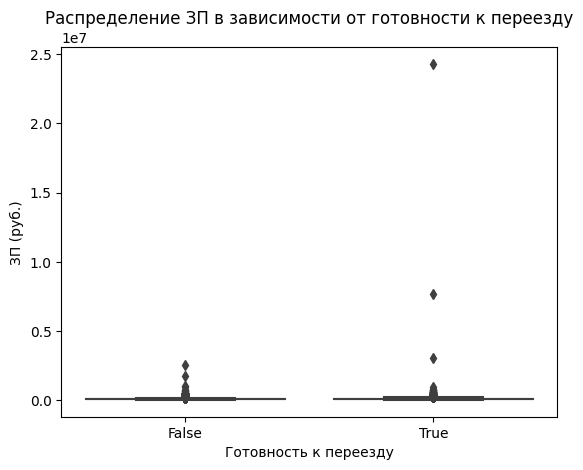

In [853]:
import seaborn as sns
import matplotlib.pyplot as plt

# Используем ранее созданный признак "Готовность к переезду" из бинарных данных
sns.boxplot(x='Готовность к переезду', y='ЗП (руб.)', data=data)
plt.title('Распределение ЗП в зависимости от готовности к переезду')
plt.xlabel('Готовность к переезду')
plt.ylabel('ЗП (руб.)')
plt.show()


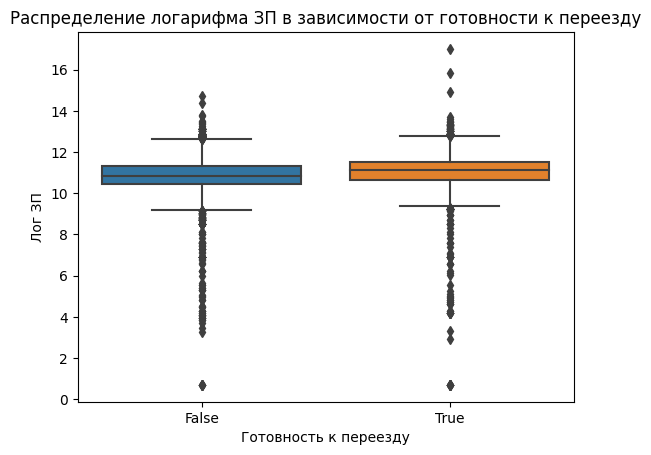

In [854]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Применяем логарифмическую шкалу к оси y
data['Лог ЗП'] = np.log1p(data['ЗП (руб.)'])

# Используем ранее созданный признак "Готовность к переезду" из бинарных данных
sns.boxplot(x='Готовность к переезду', y='Лог ЗП', data=data)
plt.title('Распределение логарифма ЗП в зависимости от готовности к переезду')
plt.xlabel('Готовность к переезду')
plt.ylabel('Лог ЗП')
plt.show()

Соискатели, готовые к переезду, имеют более высокие зарплатные ожидания. Это может указывать на то, что готовность к географической мобильности связана с поиском более лучших карьерных возможностей и, соответственно, с более высокими требованиями к оплате, с тем, что для них карьера является основной ценностью.

Аномально высокие значения: На графике видны несколько аномально высоких значений желаемой заработной платы, особенно среди тех, кто готов к переезду. Это могут быть аномалии, связанные с особенно квалифицированными специалистами или нереалистичными ожиданиями соискателей.

Для проведения детального анализа обоих графиков необходимо рассмотреть следующее:

Проверить данные на предмет ввода, особенно для высоких значений опыта и заработной платы.
Исследовать, есть ли корреляция между желаемой заработной платой и другими факторами, такими как образование, специализация, индустрия или регион.
Анализировать тренды с учетом индустрии и специализации, чтобы понять, какие отрасли или роли предлагают более высокую заработную плату и как это соотносится с готовностью к переезду.

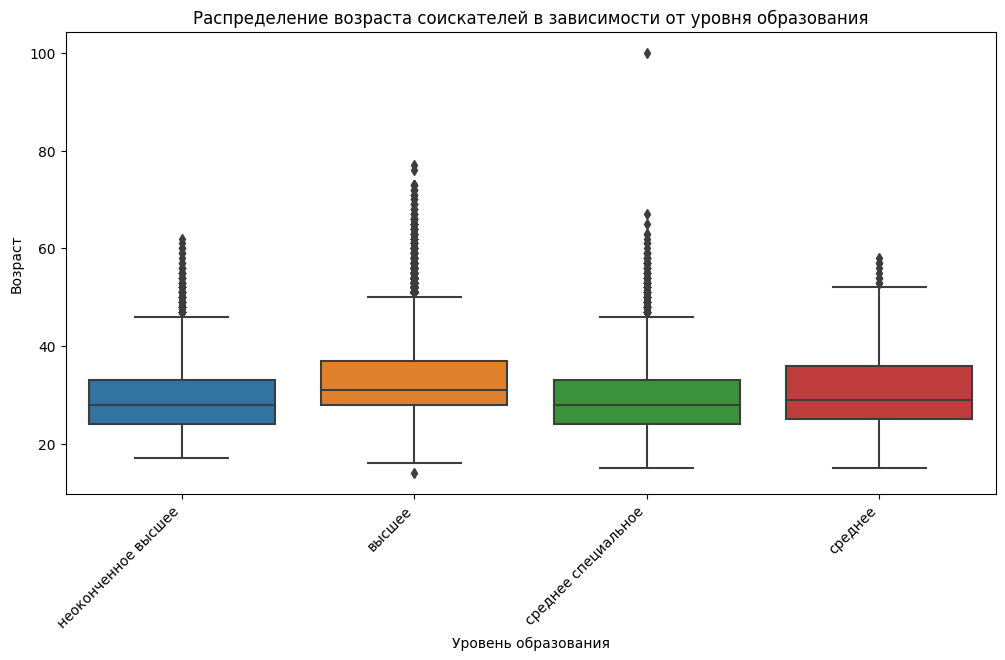

In [855]:
# Распределение возраста соискателей в зависимости от уровня образования
plt.figure(figsize=(12, 6))
sns.boxplot(x='Образование', y='Возраст', data=data)
plt.title('Распределение возраста соискателей в зависимости от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Возраст')
plt.xticks(rotation=45, ha='right')
plt.show()


**Общие выводы:**<br>
Соискатели, готовые к переезду, в среднем имеют более высокие ожидания по заработной плате.<br>
Возраст и образование являются важными факторами, которые влияют на ожидания соискателей относительно заработной платы и могут влиять на их привлекательность для работодателей.<br>
Аномалии в данных, такие как необычно высокий опыт работы или желаемая заработная плата, требуют дополнительной проверки и корректировки, чтобы обеспечить точность и надежность данных для анализа.<br>
Эти выводы могут быть использованы hr.ru для оптимизации стратегий поиска и привлечения талантов, а также для информирования соискателей о том, как возраст и образование могут влиять на их карьерные перспективы и ожидания заработной платы.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [856]:
num_rows_before = data.shape[0]
data.drop_duplicates(inplace=True)

# Количество удаленных дубликатов
num_rows_before - data.shape[0]

161

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [857]:
data.isnull().sum()

Пол, возраст                         0
Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Занятость_полная занятость           0
Занятость_частичная занятость        0
Занятость_проектная работа           0
Занятость_волонтерство               0
Занятость_стажировка                 0
График_гибкий график                 0
График_полный день                   0
График_сменный график                0
График_удаленная работа              0
График_вахтовый метод                0
ЗП (руб.)                            0
Опыт работы (год)        

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [858]:
data = data.dropna(subset=["Последнее/нынешнее место работы", "Последняя/нынешняя должность"])

In [859]:
data['Опыт работы (месяц)'].fillna(data["Опыт работы (месяц)"].median(), inplace=True)

<ipython-input-859-9d7622698237>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [860]:
data['Опыт работы (месяц)'].mean()

114.35777573405711

In [861]:
data.isnull().sum()

Пол, возраст                         0
Ищет работу на должность:            0
Последнее/нынешнее место работы      0
Последняя/нынешняя должность         0
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                  0
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Занятость_полная занятость           0
Занятость_частичная занятость        0
Занятость_проектная работа           0
Занятость_волонтерство               0
Занятость_стажировка                 0
График_гибкий график                 0
График_полный день                   0
График_сменный график                0
График_удаленная работа              0
График_вахтовый метод                0
ЗП (руб.)                            0
Опыт работы (год)        

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [862]:
data = data[(data["ЗП (руб.)"] > 1000) & (data["ЗП (руб.)"] < 1000000)]
data.shape[0]

44469

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [863]:
data = data[data['Опыт работы (месяц)'] / 12 < data['Возраст']]
data.shape[0]

44462

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3


,"Пол, возраст",Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование,Пол,Возраст,...,Занятость_волонтерство,Занятость_стажировка,График_гибкий график,График_полный день,График_сменный график,График_удаленная работа,График_вахтовый метод,ЗП (руб.),Опыт работы (год),Лог ЗП
31137,"Мужчина , 15 лет , родился 11 мая 2004",Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,Среднее образование 2021 ГБОУ Гимназия №528,2019-04-06,Не указано,среднее,Мужчина,15,...,False,False,True,False,True,True,False,10000.0,0.166667,9.210440
32950,"Мужчина , 15 лет , родился 1 июня 2003",Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,Среднее специальное образование 2020 Жмых Жмых...,2019-04-09,Не указано,среднее специальное,Мужчина,15,...,False,False,False,True,False,False,False,2000.0,0.250000,7.601402
33654,"Мужчина , 100 лет , родился 1 января 1919",Frontend-разработчик,Freelance,Frontend-разработчик,Среднее специальное образование 2015 Санкт-Пе...,2019-04-19,Не указано,среднее специальное,Мужчина,100,...,False,True,True,True,False,True,False,60000.0,2.500000,11.002117


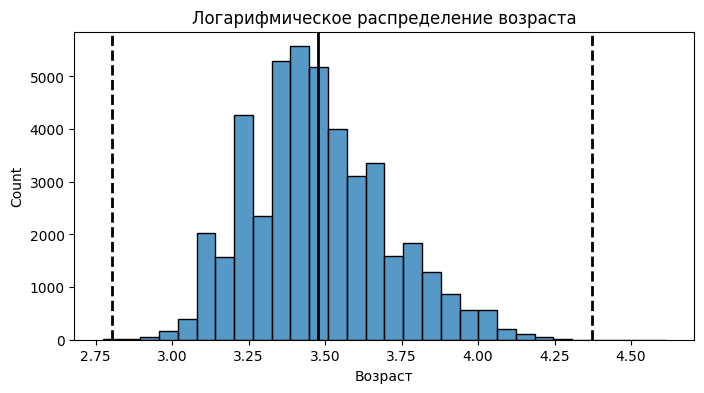

In [864]:
# Функция очистки выбросов по Z-score
def outliers_z_score(df, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(df[feature] + 1)
    else:
        x = df[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = df[(x < lower_bound) | (x > upper_bound)]
    return outliers


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_ages = np.log(data['Возраст'] + 1)
histplot = sns.histplot(log_ages, bins=30, ax=ax)
histplot.axvline(log_ages.mean(), color='k', linewidth=2)
histplot.axvline(log_ages.mean() + 4 * log_ages.std(), color='k', linestyle='--', linewidth=2)
histplot.axvline(log_ages.mean() - 3 * log_ages.std(), color='k', linestyle='--', linewidth=2)
histplot.set_title('Логарифмическое распределение возраста')
outliers = outliers_z_score(data, 'Возраст', log_scale=True, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
outliers

**Выводы:**<br>
Распределение близкое к нормальному, выглядит симметричным относительно центральной части гистограммы, но есть лёгкое смещение влево (отрицательная асимметрия), что означает, что более молодые возрастные группы представлены более значительно по сравнению со старшими группами. Это видно по тому, что "хвост" распределения тянется влево от медианы. <br>

На графике также указано число выбросов, обнаруженных с помощью метода z-отклонения (3 выброса):<br><br>

1) Мужчина, 15 лет, Менеджер по работе с клиентами.<br>
Возраст соискателя составляет всего 15 лет, что является достаточно молодым для включения в базу данных hh.ru, где большинство кандидатов — это взрослые, ищущие полноценную работу.<br>
Заявленный опыт работы - около 2 месяцев - мог быть стажировкой или временной работой, и это соответствует возрасту.
Желаемая заработная плата в 10,000 рублей кажется реалистичной для подработки на частичную занятость.<br><br>

1) Мужчина, 15 лет, Тестировщик игр.<br>
Соискатель также очень молод, занимается тестированием игр, это может быть хобби или частью учебного проекта.<br>
Заработная плата в 2,000 рублей представляется низкой даже для стажировки.<br><br>
Эти данные могут быть реальными для молодых людей, начинающих свою карьеру в игровой индустрии, но всё же выглядят как аномалия в общем контексте рынка труда и могут искажать результаты исследования рынка труда.<br><br>

3) Мужчина, 100 лет, Frontend-разработчик.<br>
Возраст в 100 лет явно выглядит как выброс и, скорее всего, представляет собой ошибку ввода данных.<br>
Опыт работы в 2.5 года для 100-летнего frontend-разработчика звучит нереалистично, особенно учитывая динамично развивающуюся область IT.
Заработная плата в 60,000 рублей может быть адекватной для frontend-разработчика, но с учетом возраста данные вызывают сомнения.<br>
